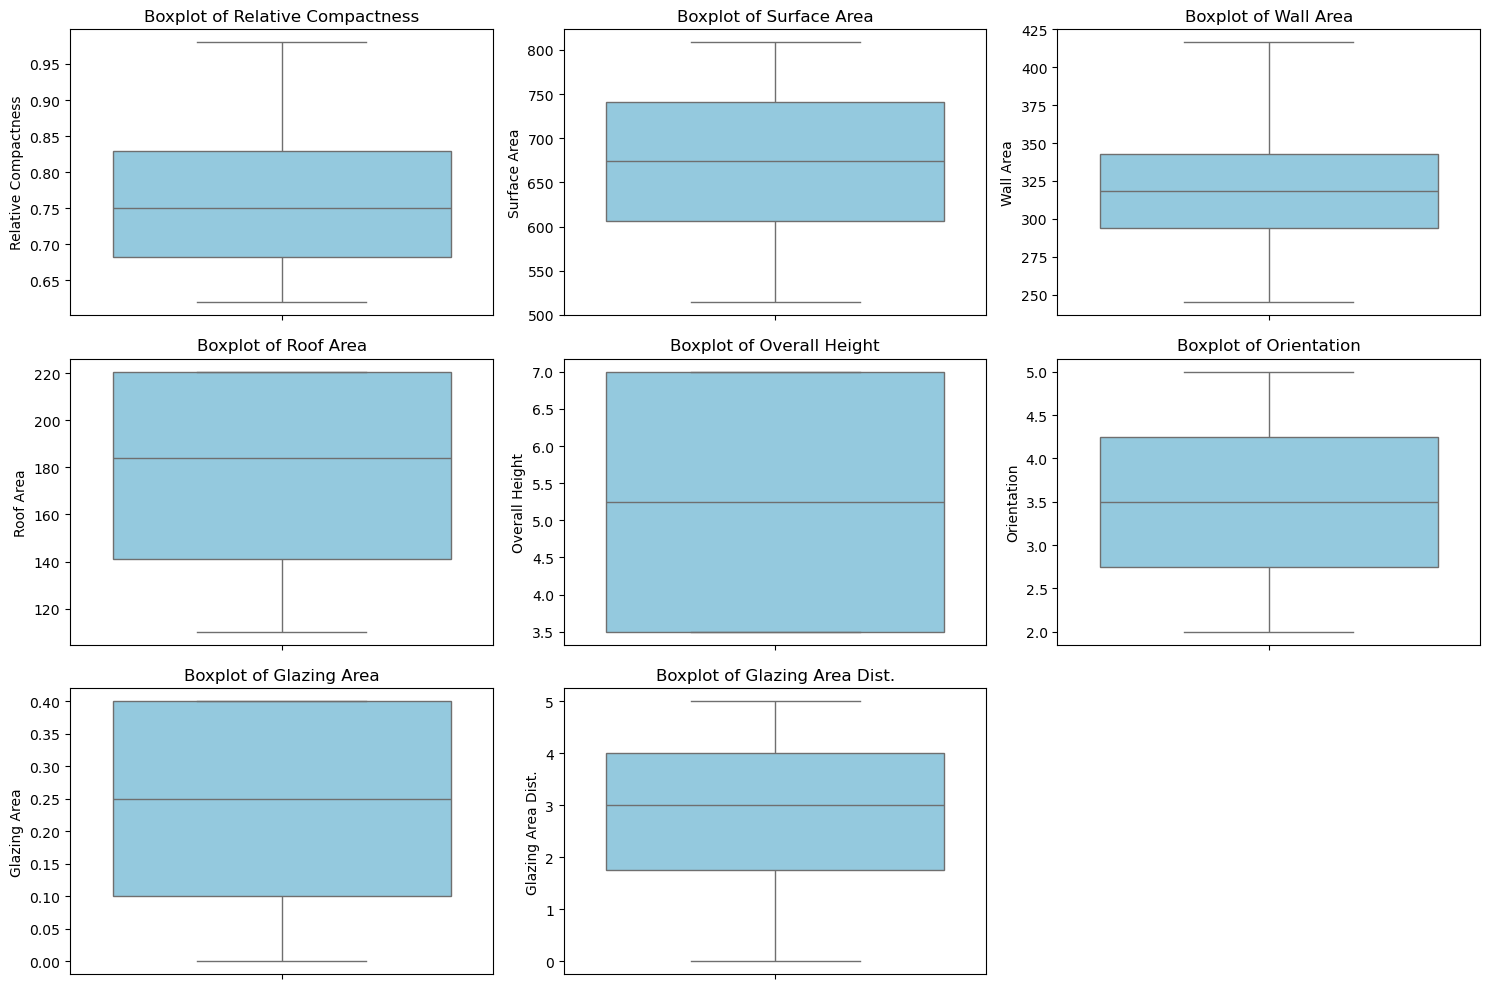

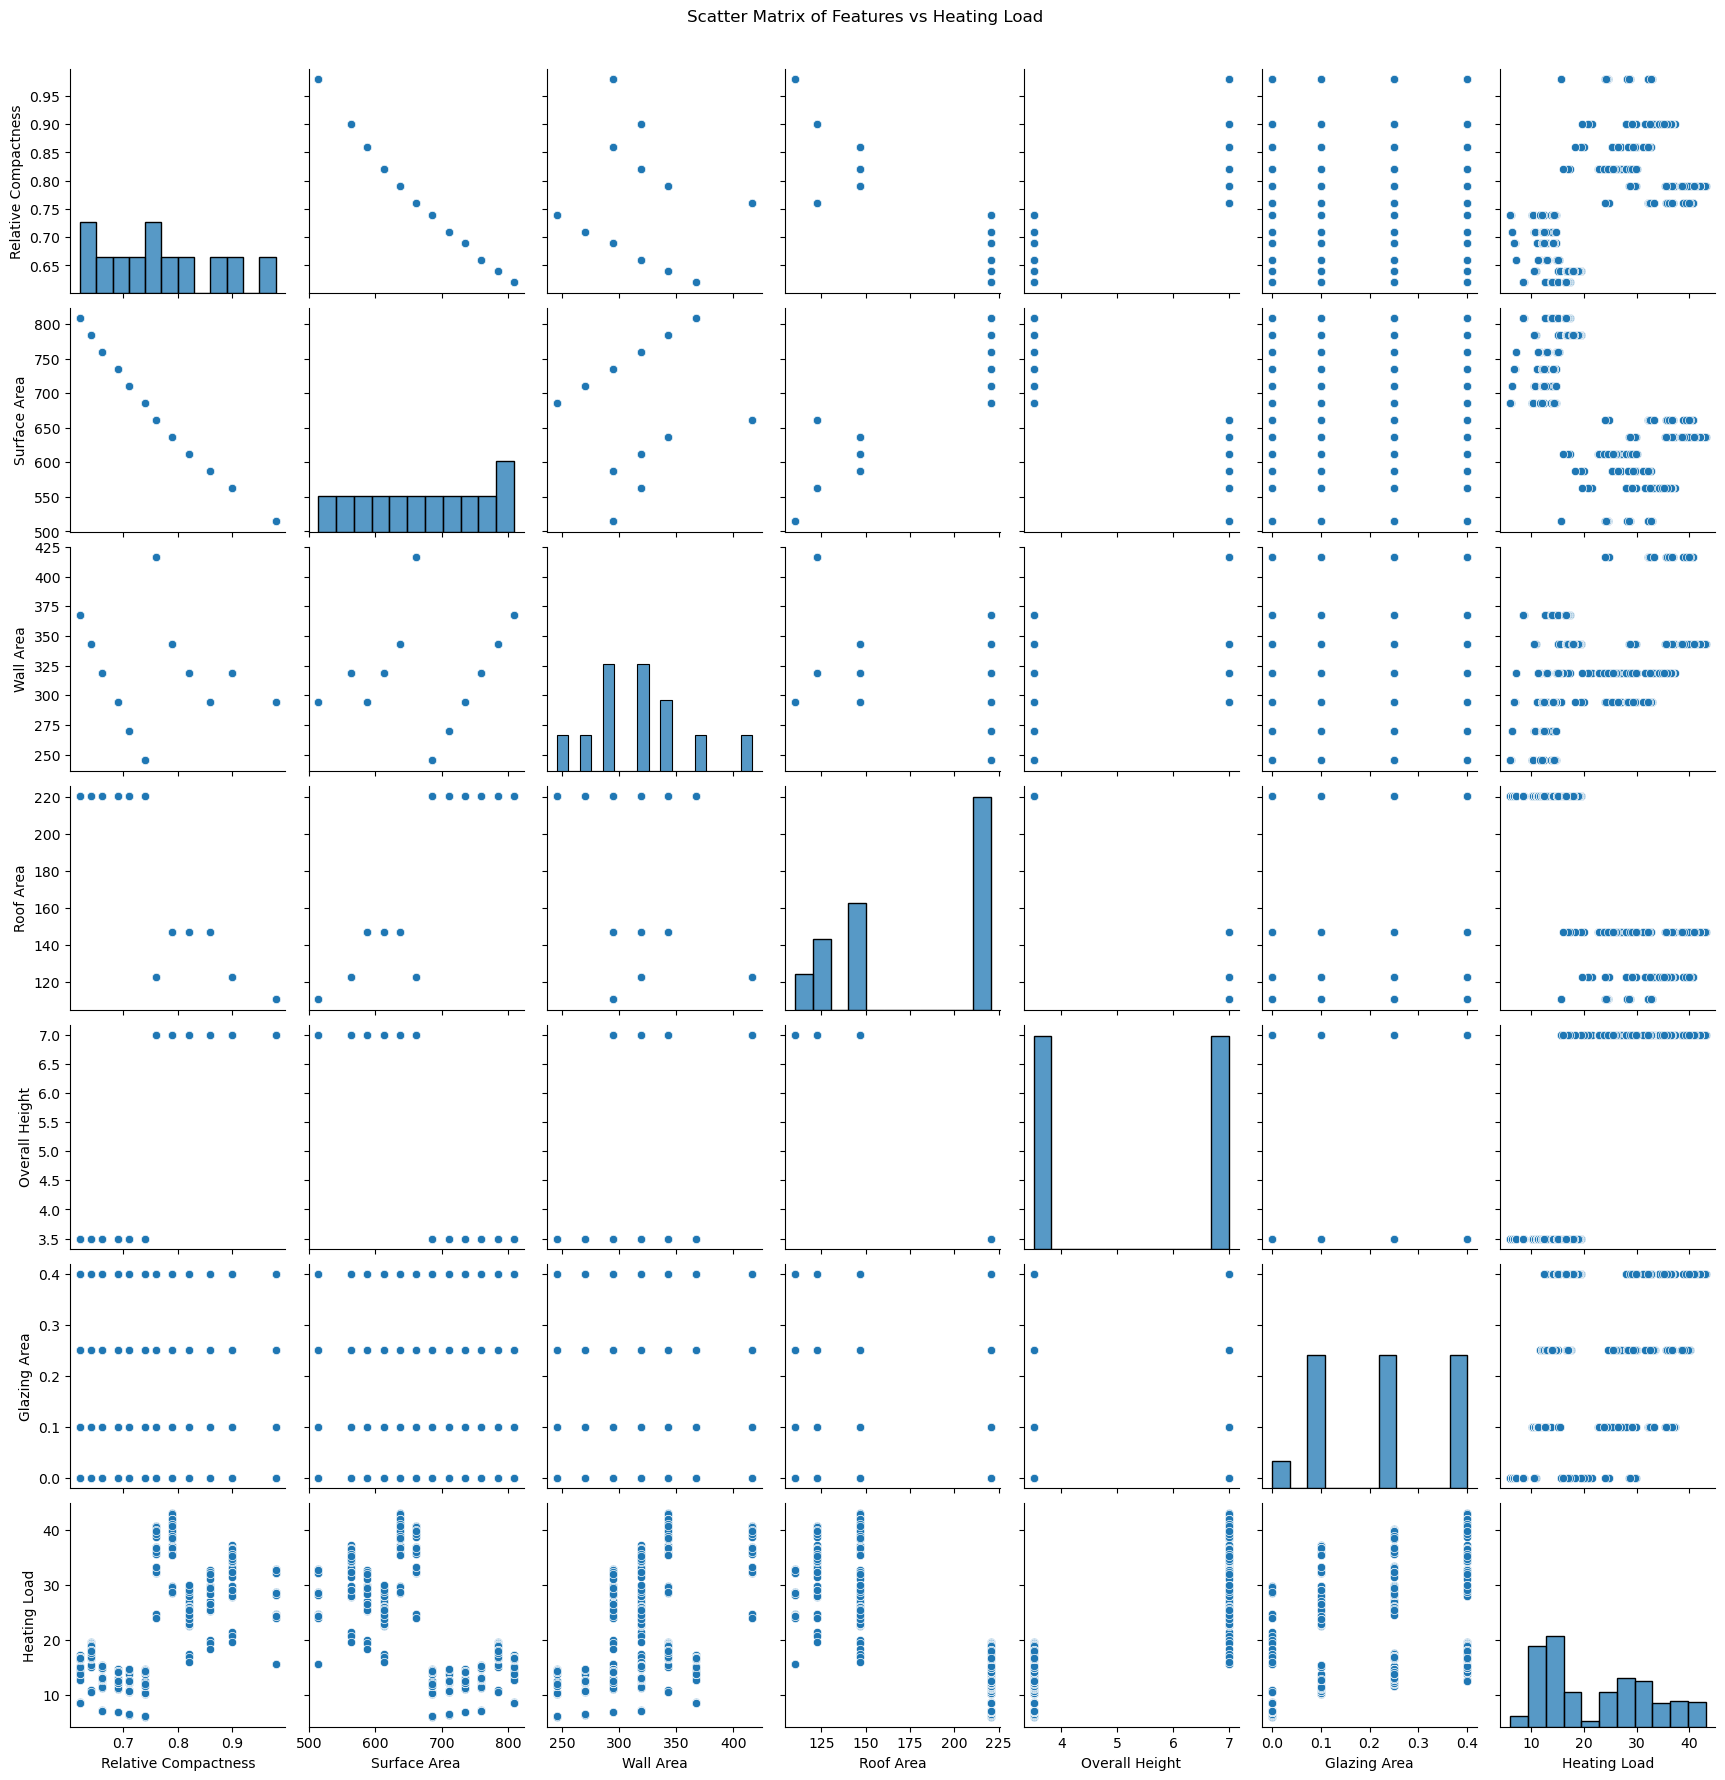

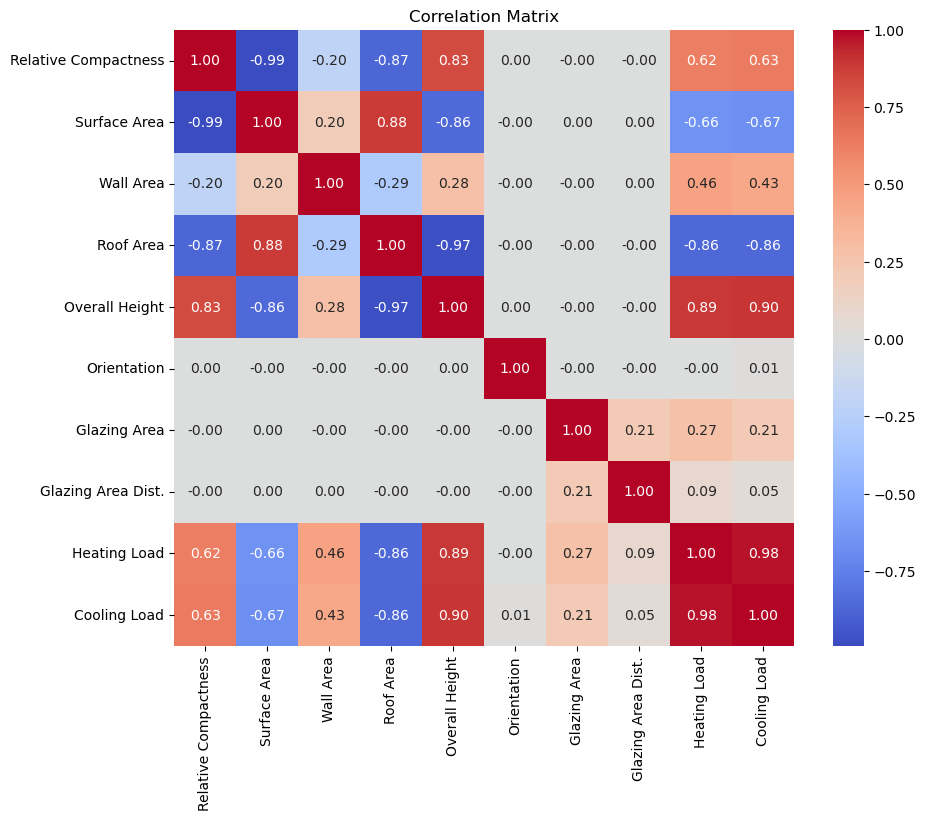

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel("ENB2012_data.xlsx")
df.columns = [
    "Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
    "Overall Height", "Orientation", "Glazing Area", "Glazing Area Dist.",
    "Heating Load", "Cooling Load"
]

# Boxplots to detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:8], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Pairplot (scatter matrix)
sns.pairplot(df[["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", 
                 "Overall Height", "Glazing Area", "Heating Load"]], diag_kind="hist")
plt.suptitle("Scatter Matrix of Features vs Heating Load", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
#Data Processing
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_excel("ENB2012_data.xlsx")

# Rename columns for convenience
df.columns = [
    "Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
    "Overall Height", "Orientation", "Glazing Area", "Glazing Area Dist.",
    "Heating Load", "Cooling Load"
]

# Select relevant features and target
features = df[[
    "Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
    "Overall Height", "Glazing Area"
]]
target = df["Heating Load"]

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [21]:
#model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

# Build and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Model Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f"R²: {r2:.3f}")
print(f"Adjusted R²: {adj_r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.911
Adjusted R²: 0.908
MAE: 2.17
MSE: 9.24
RMSE: 3.04


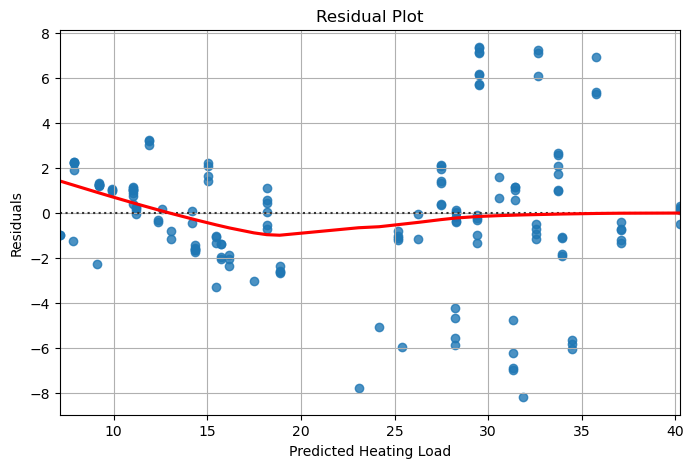

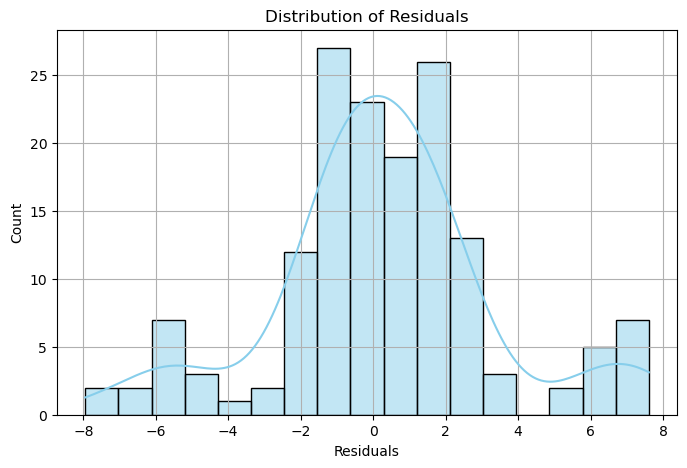

In [13]:
#Residual Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Heating Load")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color="skyblue")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

In [15]:
import statsmodels.api as sm

# OLS model with statsmodels for detailed coefficient summary
X_const = sm.add_constant(features_scaled)
ols_model = sm.OLS(target, X_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating Load   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1646.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:27:46   Log-Likelihood:                -1916.8
No. Observations:                 768   AIC:                             3846.
Df Residuals:                     762   BIC:                             3873.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.3072      0.106    209.777      0.0